In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/twitter_data.csv', encoding='ISO-8859-1', names=['target', 'ids', 'date', 'flag', 'user', 'text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Information about the Dataset

In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Finding any Missing Values or Null Values

In [ ]:
np.sum(df.isnull().any(axis=1))

0

Selecting the Target Variables

In [ ]:
data=df[['text','target']]

In [ ]:
data['target'].unique()

array([0, 4])

In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-113-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([0, 1])

Adding Positive and Negative Tags

In [ ]:
pos = data[data['target'] == 1]
neg = data[data['target'] == 0]

In [ ]:
pos = pos.iloc[:int(20000)]
neg = neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([pos, neg])

Performing Data Preprocessing

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].head()

800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stemmer = PorterStemmer()

In [ ]:
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stop_words]))
dataset['text'].head()

800000                  love @health4uandpet u guy r best!!
800001    im meet one besti tonight! cant wait!! - girl ...
800002    @darealsunisakim thank twitter add, sunisa! go...
800003    sick realli cheap hurt much eat real food plus...
800004                       @lovesbrooklyn2 effect everyon
Name: text, dtype: object

In [ ]:
dataset['text'] = dataset['text'].str.replace('@\S+', '')
dataset['text'] = dataset['text'].str.replace('[^a-zA-Z]', ' ')

<ipython-input-122-1d402ac0f9ea>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['text'] = dataset['text'].str.replace('@\S+', '')
<ipython-input-122-1d402ac0f9ea>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['text'] = dataset['text'].str.replace('[^a-zA-Z]', ' ')


In [ ]:
dataset.head()

,text,target
800000,love u guy r best,1
800001,im meet one besti tonight cant wait girl ...,1
800002,thank twitter add sunisa got meet hin show ...,1
800003,sick realli cheap hurt much eat real food plus...,1
800004,effect everyon,1


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000                              [love, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [thank, twitter, add, sunisa, got, meet, hin, ...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                                    [effect, everyon]
Name: text, dtype: object

Creating a Model

In [ ]:
X=data.text
y=data.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
X_train

<1520000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 30119217 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def model_Evaluate(model):
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model Evaluation

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



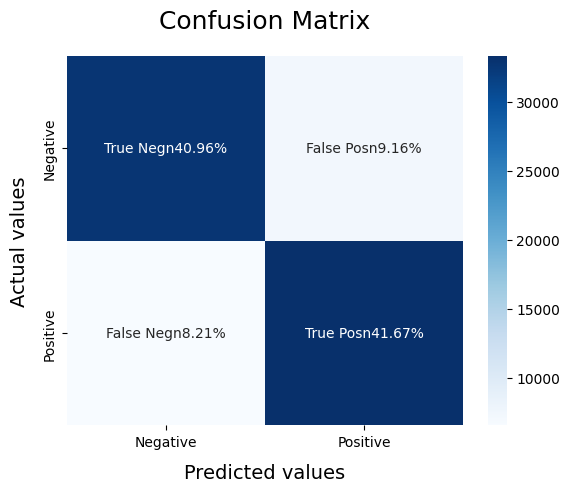

In [ ]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

Testing the Model

In [ ]:
text = input()

hating this agenda


In [ ]:
text = text.lower()
text = text.replace('@\S+', '')
text = text.replace('[^a-zA-Z]', ' ')
text = text.replace('((www.[^s]+)|(https?://[^s]+))',' ')

In [ ]:
text = tokenizer.tokenize(text)
print(text)

['hating', 'this', 'agenda']


In [ ]:
text = [word for word in text if word.lower() not in stop_words]
print(text)

['hating', 'agenda']


In [ ]:
text = [stemmer.stem(word) for word in text]
print(text)

['hate', 'agenda']


In [ ]:
text  = vectoriser.transform(text)
text

<2x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred4 = LRmodel.predict(text)
y_pred4

array([0, 1])

In [ ]:
sentiment_label = "Negative" if y_pred4.all() == 0 else "Positive"
print("Sentiment:", sentiment_label)

Sentiment: Negative
